In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('advertising.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for any missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


First few rows of the dataset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Summary statistics of the dataset:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

Missing values in each column:
Unnamed: 0    0
TV            0


Pairplot of features vs Sales:


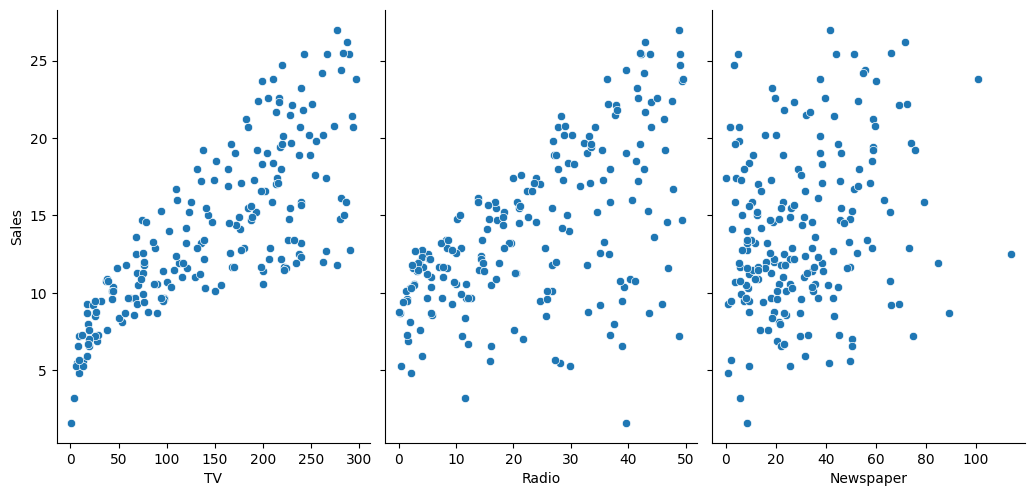


Correlation matrix:
            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


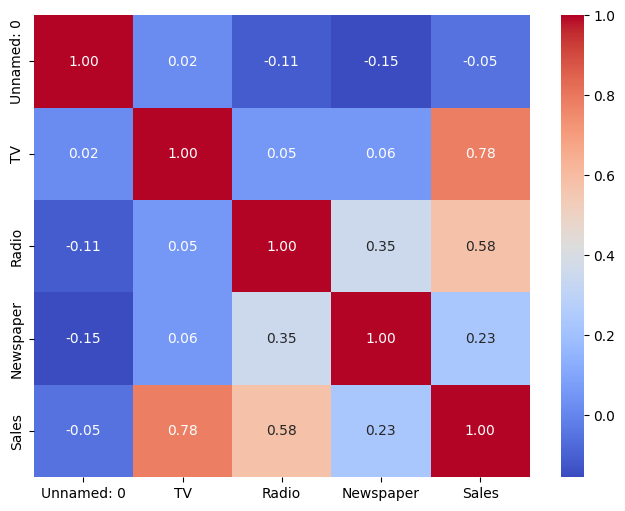

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the relationships between features and the target variable
print("\nPairplot of features vs Sales:")
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7)
plt.show()

# Compute the correlation matrix
corr_matrix = df.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of training set (X_train):", X_train.shape)
print("Shape of testing set (X_test):", X_test.shape)



Shape of training set (X_train): (160, 3)
Shape of testing set (X_test): (40, 3)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Create a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline to a file
joblib.dump(pipeline, 'pipe.pkl')
print("\nPipeline saved as 'pipe.pkl'")



Pipeline saved as 'pipe.pkl'



Mean Squared Error: 3.174097353976107
R-squared: 0.8994380241009119


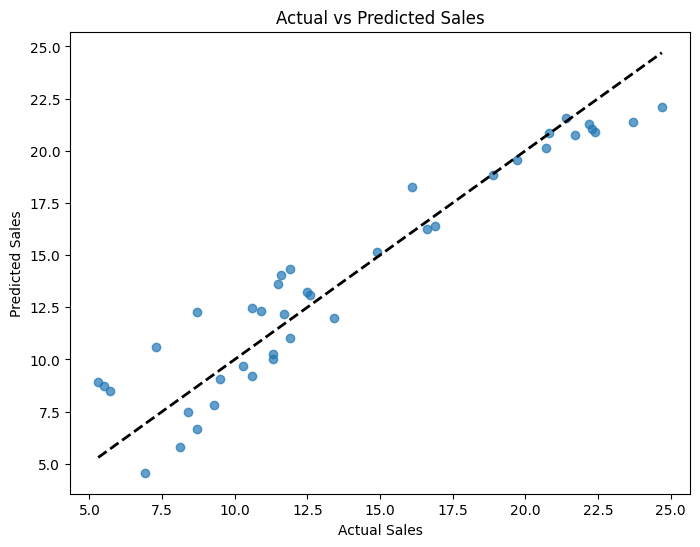

TypeError: residplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 800x600 with 0 Axes>

In [8]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# Residuals plot
plt.figure(figsize=(8, 6))
sns.residplot(y_test, y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Sales")
plt.show()


In [9]:
# Load the pipeline
pipeline = joblib.load('pipe.pkl')

# Example: Predict sales for new advertising budgets
new_data = pd.DataFrame({
    'TV': [150, 200],
    'Radio': [30, 40],
    'Newspaper': [20, 25]
})

# Predict sales
predicted_sales = pipeline.predict(new_data)
print("\nPredicted sales for new advertising budgets:")
print(predicted_sales)

# Adding the predictions to the new_data DataFrame
new_data['Predicted Sales'] = predicted_sales

print("\nNew advertising budgets with predicted sales:")
print(new_data)



Predicted sales for new advertising budgets:
[15.41956887 19.56180086]

New advertising budgets with predicted sales:
    TV  Radio  Newspaper  Predicted Sales
0  150     30         20        15.419569
1  200     40         25        19.561801


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Cross-validation with Linear Regression
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print("\nCross-validated MSE for Linear Regression:", -cv_scores.mean())

# Try a different model: Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
rf_y_pred = rf_pipeline.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"\nRandom Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")

# Cross-validation with Random Forest
cv_rf_scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print("\nCross-validated MSE for Random Forest:", -cv_rf_scores.mean())



Cross-validated MSE for Linear Regression: 3.07294659710021

Random Forest Mean Squared Error: 0.5910253749999989
Random Forest R-squared: 0.9812750924472915

Cross-validated MSE for Random Forest: 0.6481971549999979
